In [12]:
# libraries used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import datetime
import math

%matplotlib inline

# needed for treemap graphic
#!pip install squarify 
#import squarify

print("loaded libraries")

loaded libraries


In [13]:
# load up csv files

github_url = "https://raw.githubusercontent.com/werntzp/hockey-stats/master/"

df_games = pd.read_csv(github_url + "gavin_2021-22_wlc.csv") 

print("loaded csv files")

loaded csv files


In [14]:
# plot linear regression of Gavin's goals and shots to look for games where he out/under performed against expectations

fig = px.scatter(data_frame=df_games, x = 'shots', y = 'oppscore', hover_data=['game', 'opp'], trendline='ols')
fig.show()


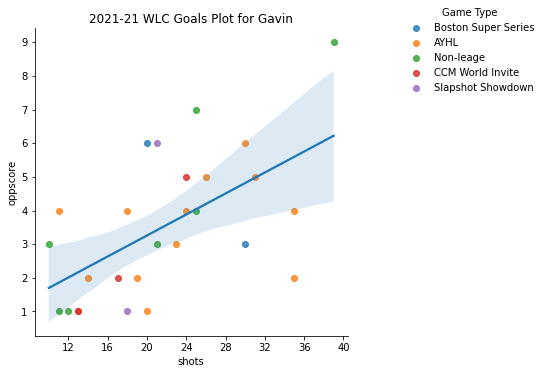

In [15]:
# plot linear regression of Gavin's goals and shots to look for games where he out/under performed against expectations

graph = sns.lmplot(x='shots', y='oppscore', hue='league', data=df_games, fit_reg=False)
ax = sns.regplot(x='shots', y='oppscore', data=df_games, scatter=False) 

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('2021-21 WLC Goals Plot for Gavin')

# title
new_title = 'Game Type'
graph._legend.set_title(new_title)
graph._legend.set_bbox_to_anchor((1.35, .9))
# replace labels
new_labels = ['Boston Super Series', 'AYHL', 'Non-leage','CCM World Invite', 'Slapshot Showdown']
for t, l in zip(graph._legend.texts, new_labels): 
  t.set_text(l)




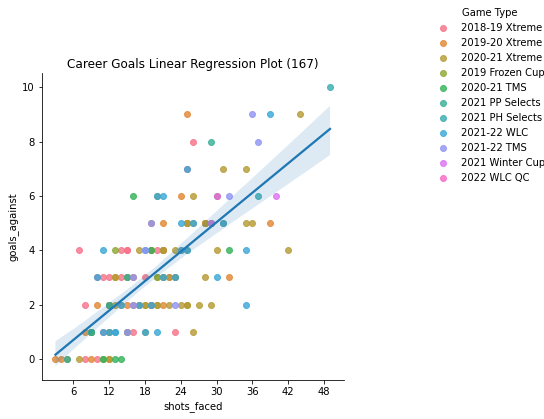

In [25]:
# map goals/shots from all of Gavin's seasons 

# create a new data frame with totals
dfx = pd.DataFrame(columns=["game",	"goals_against",	"shots_faced", "game_type"])
dfx.iloc[0:0]

# 2018-19 
dfs = pd.read_csv(github_url + "gavin_2018-19_ax.csv") 
games = dfs.game
for g in games: 
  game_type = "18"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# 2019-20
dfs = pd.read_csv(github_url + "gavin_2019-20_ax.csv") 
games = dfs.game
for g in games: 
  game_type = "19"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# 2020-21
dfs = pd.read_csv(github_url + "gavin_2020-21_ax.csv") 
games = dfs.game
for g in games: 
  game_type = "20"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for frozen cup, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2019_frozen_cup.csv") 
games = dfs.game
for g in games: 
  game_type = "fc"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for 2020 middle school, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2020-21_tms.csv") 
games = dfs.game
for g in games: 
  game_type = "ms20"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for power play selects spring, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2021_pps.csv") 
games = dfs.game
for g in games: 
  game_type = "pps21"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for gatorade, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2021_gatorade.csv") 
games = dfs.game
for g in games: 
  game_type = "phs21"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# 2021-22   

# loop through those games to pull out opponent shots and total up 
for g in df_games.game: 
  game_type = "21"
  # total goals 
  goals = df_games[df_games.game == g].oppscore.iloc[0]
  shots = df_games[df_games.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for 2021 middle school, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2021-22_tms.csv") 
games = dfs.game
for g in games: 
  game_type = "ms21"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for 2021 winter cup, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2021_wintercup.csv") 
games = dfs.game
for g in games: 
  game_type = "wc21"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for 2022 WLC Quebec team, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_2022_wlc_quebec.csv") 
games = dfs.game
for g in games: 
  game_type = "qc22"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

#print(dfx)

# set up the plot 
graph = sns.lmplot(x='shots_faced', y='goals_against', hue='game_type', data=dfx, fit_reg=False)
ax = sns.regplot(x='shots_faced', y='goals_against', data=dfx, scatter=False) 

# title
new_title = 'Game Type'
graph._legend.set_title(new_title)
graph._legend.set_bbox_to_anchor((1.3, .9))
# replace labels
new_labels = ['2018-19 Xtreme', '2019-20 Xtreme', '2020-21 Xtreme', '2019 Frozen Cup', '2020-21 TMS', '2021 PP Selects', '2021 PH Selects', '2021-22 WLC', '2021-22 TMS', '2021 Winter Cup', '2022 WLC QC']
for t, l in zip(graph._legend.texts, new_labels): 
  t.set_text(l)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
num_games = len(dfx.index)
ax.set_title('Career Goals Linear Regression Plot (' + str(num_games) + ')')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))



In [26]:
# copy into new data frame and map columns
dfs = dfx
dfs["game_type"] = dfs["game_type"].map({"18": "AX18", "19": "AX19", "20": "AX20", "fc": "FC19", "ms20": "TMS20", "pps21": "PPS21", "phs21": "PHS21", "21": "WLC21", "ms21": "TMS21", "wc21": "WLC21", "qc22": "WLCQC22"})


Text(0.5, 1.0, 'Career Goals Strip Plot')

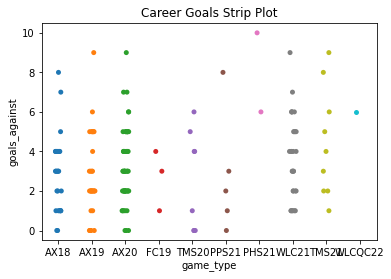

In [27]:
# create a swarm plot for goals over the seasons
ax = sns.stripplot(data=dfs, x=dfs['game_type'], y=dfs['goals_against'], dodge=True, jitter=True)
ax.set_title("Career Goals Strip Plot")
